# Implementación de Bandidos de K-brazos #

En este ejercicio estableceremos las tres implementaciones de bandidos de K-brazos. Estos son:
1. Bandido greedy
2. Bandido con &epsilon;-decay
3. Bandido con reocmpensas no estacionarias

Por defecto, utilizaremos bandidos con 10 brazos, sin embargo este será un valor parametrizable.

## 1. Bandido greedy ##

La definición de los bandidos consiste en crear un agente, como una clase de Python, `Bandit`. Inicialmente crearemos un bandido con una cantidad de brazos dado por parámetro (por defecto utilizaremos 10 brazos). 
Cada uno de los brazos del bandido (definidos en una lista `arms` como un atributo de la clase) tiene su propia recompensa, la cual asignaremos como un número flotante aleatorio en el rango `[-3,3]` (utilizando la función `random.uniform(-3,3)` de la librería random). Adicionalmente, definimos un atributo de la clase (`reward`) para mantener la recompensa cumulativa del bandido.
Inicialmente nuestro bandido tiene dos funciones `choose_arm` y `run`.

- `choose_arm` no tienen parámetros. Esta función se encarga de seleccionar un brazo a ejecutar (de forma aleatoria en caso de empate), y retorna la recompensa recibida de acuerdo a la fórmula:

![title](https://raw.githubusercontent.com/FLAGlab/isis4222-rl/c0d6b663b8ce1dd5057c0c06e30ccde46b5409c6/week2/img/bandit_formula.png)

Retornando la recompensa promedio obtenida por el agente al escoger el brazo dado.

Para poder realizar este cálculo, debemos llevar la cuenta de la cantidad de veces que ha sido escogido cada brazo y la recompensa acumulada de cada brazo. Esta información la definimos como atributos de la clase, en las variables `occurrences` y `cumulative_rewards`,  respectivamente. Ambos atributos se definen como una lista de tamaño número de brazos del bandido inicialmente en 0.

El cálculo de la recompensa primero actualiza las ocurrencias de escoger el brazo seleccionado aleatoriamente, `arm`. Además debemos actualizar la recompensa cumulativa del brazo `arm`, sumando la recompensa correspondiente al brazo (obtenida de la lista de brazos). Finalmente, calculamos Q<sub>t</sub>(a) como la recompensa cumulativa sobre las ocurrencias para el brazo dado y retornamos dicho valor. La recompensa global del agente se actualiza con el valor calculado.

- `run` no recibe ningún parámetro. Esta función define la cantidad de episodios para los cuales vamos a calcular la recompensa del agente (1000 en nuestro caso)
Luego creamos un bandido (`bandit`) y una variable para almacenar la recompensa obtenida en cada iteración (`expected_reward`).
Para cada uno de los episodios, ejecutamos el bandido llamando la función choose_arm y guardamos el resultado en la lista de recompensas esperadas.
Finalmente retornamos la lista de recompensas para cada iteración (`expected_reward`).

In [2]:
import random


class GreedyBandit:
    def __init__(self, n_arms=10):
        self.arms = [random.uniform(-3, 3) for _ in range(n_arms)]
        self.reward = 0
        self.expected_rewards = [0] * n_arms
        self.cumulative_rewards = [0] * n_arms
        self.occurrences = [0] * n_arms

    def choose_arm(self):
        best_reward = max(self.expected_rewards)
        candidate_arms = [i for i, reward in enumerate(self.expected_rewards) if reward == best_reward]
        chosen_arm = random.choice(candidate_arms)
        reward = self.arms[chosen_arm]
        self.cumulative_rewards[chosen_arm] += reward
        self.occurrences[chosen_arm] += 1
        self.expected_rewards[chosen_arm] = self.cumulative_rewards[chosen_arm] / self.occurrences[chosen_arm]
        return self.expected_rewards[chosen_arm]

    def run(self, episodes=10):
        expected_reward = [0 for _i in range(episodes)]
        for i in range(0, episodes):
            expected_reward[i] = self.choose_arm()
        return expected_reward

In [3]:
greedy_bandit = GreedyBandit()
print(greedy_bandit.run(episodes=10))

print(greedy_bandit.expected_rewards)
print(greedy_bandit.occurrences)

[-0.09911767473054489, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407, 0.8539208955224407]
[0, 0, 0.8539208955224407, 0, 0, 0, 0, -0.09911767473054489, 0, 0]
[0, 0, 9, 0, 0, 0, 0, 1, 0, 0]


## 2. Bandidos con &epsilon;-decay ##

Implemente el algoritmos de los bandidos ahora utilizando la estrategia de epsilon decay para mediar entre la exploración y la explotación de los bandidos.
Recuerde que esta nueva estrategia se basa en escoger la acción con mayor recompensa esperada Q<sub>n+1</sub> con probabilidad &epsilon; y una acción aleatoria con probabilidad 1-&epsilon;.

Para ello, modifique el bandido implementado anteriormente (`Bandit`) agregando un nuevo atributo `epsilon` con un valor de 0.1 por defecto. Además agregue una nueva función `choose_arm` que retorna la acción a tomar, siguiendo las especificaciones del valor &epsilon;. La función `choose_arm` será utilizada desde la función `run` para escoger el brazo.

In [4]:
import random


class EpsilonBandit:
    def __init__(self, n_arms=10, epsilon=0.9):
        self.epsilon = epsilon
        self.arms = [random.uniform(-3, 3) for _ in range(n_arms)]
        self.reward = 0
        self.expected_rewards = [0] * n_arms
        self.cumulative_rewards = [0] * n_arms
        self.occurrences = [0] * n_arms

    def choose_arm(self):
        if random.random() < self.epsilon:
            best_reward = max(self.expected_rewards)
            candidate_arms = [i for i, reward in enumerate(self.expected_rewards) if reward == best_reward]
            chosen_arm = random.choice(candidate_arms)
        else:
            chosen_arm = random.randrange(0, len(self.arms))
        reward = self.arms[chosen_arm]
        self.cumulative_rewards[chosen_arm] += reward
        self.occurrences[chosen_arm] += 1
        self.expected_rewards[chosen_arm] = self.cumulative_rewards[chosen_arm] / self.occurrences[chosen_arm]
        return self.expected_rewards[chosen_arm]

    def run(self, episodes = 10):
        expected_reward = [0 for _i in range(episodes)]
        for i in range(0, episodes):
            expected_reward[i] = self.choose_arm()
        return expected_reward

In [5]:
epsilon_bandit = EpsilonBandit()
print(epsilon_bandit.run())

print(epsilon_bandit.expected_rewards)
print(epsilon_bandit.occurrences)

[-1.9228954499944997, -0.5061363293478092, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987, 2.1196454330111987]
[0, -0.5061363293478092, -1.9228954499944997, 0, 0, 0, 0, 0, 0, 2.1196454330111987]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 8]


# 3. Bandido con recompensas no estacionarias #

Ahora retomaremos el bandido del punto 2. para permitir que las recompensas sean no estacionarias.
Para lograr este objetivo, debemos realizar las siguientes modificaciones sobre el bandido.
1. Agregar un atributo con los valores iniciales de recompensa para cada brazo. Con este proposito podemos utilizar la el atributo `arms`, que tenia la recompensa de cada brazo.
Por defecto le daremos un valor inicial a cada brazo, como un entero aleatorio entre 1 y el número de brazos.
2. Debemos introducir un atrobuto &alpha; para el bandido que tendra como valor por defecto `0.1`
3. Dentro de la función `expected_reward`, debemos modificar la recompensa de cada episodio para cada brazo. Para ello utilizaremos una función sinusoidal que nos da la recompensa actual como el seno de la multiplicación del paso actual con el brazo. Todo esto como un factor de la recompensa inicial del brazo.
4. Finalmente, dentro de la función `expected_reward`, debemos realizar el cálculo de la recompensa esperada según la fórmula de las recompensas no estacionarias y almacenarla en el atributo `cumulative_rewards` para cada brazo. 


In [17]:
import random
import math


class VariableBandit:
    def __init__(self, n_arms=10, alfa=0.1):
        self.alfa = alfa
        self.arms = [random.uniform(-3, 3) for _ in range(n_arms)]
        self.reward = 0
        self.expected_rewards = [0] * n_arms
        self.current_episode = 1

    def choose_arm(self):
        best_reward = max(self.expected_rewards)
        candidate_arms = [i for i, reward in enumerate(self.expected_rewards) if reward == best_reward]
        chosen_arm = random.choice(candidate_arms)
        reward = self.arms[chosen_arm] * math.sin(self.arms[chosen_arm] * self.current_episode)
        self.current_episode += 1
        self.expected_rewards[chosen_arm] = self.expected_rewards[chosen_arm] + self.alfa * (reward - self.expected_rewards[chosen_arm])
        return self.expected_rewards[chosen_arm]

    def run(self, episodes=10):
        expected_reward = [0 for _i in range(episodes)]
        for i in range(0, episodes):
            expected_reward[i] = self.choose_arm()
        return expected_reward

In [18]:
variable_bandit = VariableBandit()
print(variable_bandit.run())

[0.006769429748480402, 0.01917046162503631, 0.03574954464127914, 0.054829597457996274, 0.07461809701367247, 0.09332363604707133, 0.10927295297633885, 0.12102041153002, 0.12744242705389774, 0.12781036623141734]


# Ejercicio #

Una vez definidos los tres algoritmos de bandidos, debe ejecutar cada uno de ellos sobre un ambiente de pruebas (pueden usar este ejemplo de base <a href="https://github.com/FLAGlab/isis4222-rl/blob/master/week2/graph.py" >Ambiente pruebas</a>) que permita comparar los algoritmos. Dicha ejecución sera la base del análisis de los algoritmos.

Entregue:
- La implementación de cada uno de los algoritmos de bandidos como notebooks/archivos independientes
- Un pdf con:
  - El análisis del comportamiento de cada uno de los algortmos de bandidos 
  - El análisis comparativo de los tres algoritmos de bandidos


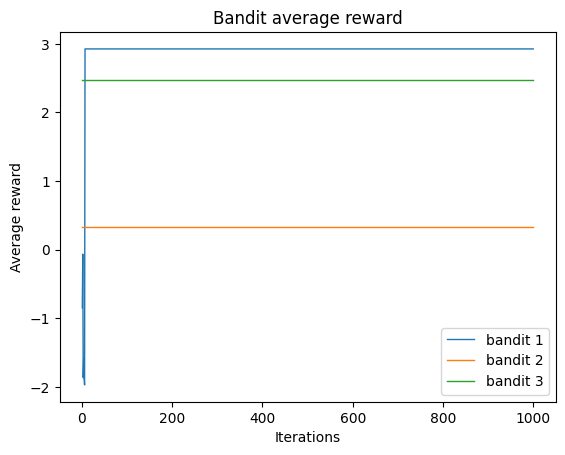

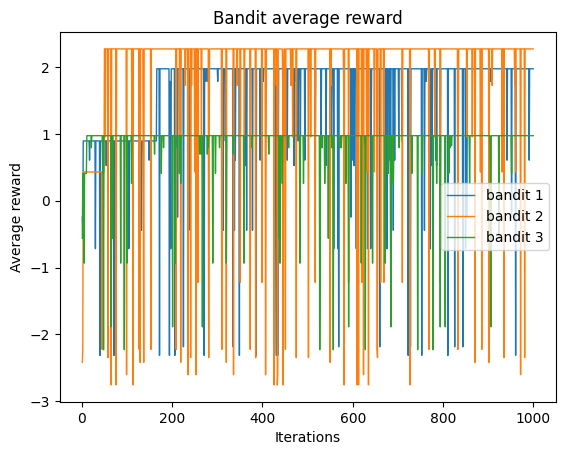

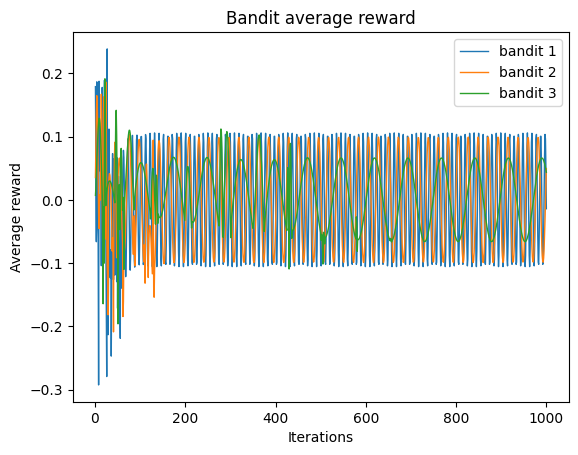

In [19]:
import matplotlib.pyplot as plt
import numpy as np


# plot definition


def plot_bandits(bandit_class, bandits=1, steps=10, n_arms=10):
    fig, ax = plt.subplots()
    plt.title("Bandit average reward")
    plt.xlabel("Iterations")
    plt.ylabel("Average reward")
    for i in range(1, bandits+1):
        bandit = bandit_class(n_arms)
        y = np.array(bandit.run(steps))
        x = np.linspace(1, steps, steps)
        ax.plot(x, y, linewidth=1.0, label=f'bandit {i}')
    ax.legend()
    plt.show()

plot_bandits(GreedyBandit, bandits=3, steps=1000)
plot_bandits(EpsilonBandit, bandits=3, steps=1000)
plot_bandits(VariableBandit, bandits=3, steps=1000)


## Analisis comparativo

### Greedy Bandit
Este agente no explora lo suficiente, lo que significa que a largo plazo no explota de forma óptima las recompensas de los mejores brazos

### Epsilon Bandit
Este agente encuentra rápidamente el brazo óptimo; sin embargo, aun después de tener información suficiente para reconocer que brazo es óptimo sigue actuando de forma aleatoria en algunas jugadas. Esto significa que la explotación no es óptima.

### Variable Bandit
Este agente Intenta una variedad de brazos en los primeros episodios, pero eventualmente escoge una estrategia que considera óptima